In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [6]:
df = pd.read_csv("/Users/jacksonyoung/Desktop/valley/project/project 2/2205150353224845/conversion_project.csv")

### Goal
- Optimizing conversion rate is likely the most common work of a data scientist
- The goal of this challenge is to build a model that predicts conversion rate, and based on the model, come up with ideas to improve revenue.

### Data Description
- We have data about users who vist our site
- We have different characteristics of these users, such as: country, age, are they new user or not, where the source come from, total page they visited
#### Thus, we want to:
- Predict conversion rate
- Give recommendations for the product team and marketing tema to improve conversion rate

In [7]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


- country: user from different country based on their ip address(catogorical data)
- age: user's age, self reported at sign-in page
- new_user: weather the user created the account during the session or had already an account and simply came back to the site
- source: marketing cahnnel(categorical data), the way that people advertised by different source
- tota_pages_visited: number of total pages visisted during the session, (engagement)
- converted: 1 means they converted within the session, 0 means they left without buying anything
##### Business goal: increase the conversion_rate: # conversion / # of total session

In [9]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


##### quick observation:
- age: mean is around 30, however it might has some outliers, min=17, max=123
- converted rate is arount 0.03, which is industrial standard

### outlier detection

In [10]:
df[df['age'] > 100]
# only two users, it is ok to remove them

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [11]:
df = df[df.age <= 100]

In [12]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


### EDA(exploratory data anaysis)

- mean conversion rate per country, we can see Chinese conversion rate is much lower than others
- German has high conversion rate
#### Compare the converted and un-converted group,

- China have really big gap of count between converted and not converted
- But not much user relatively in German

In [13]:
# group by country to get mean conversion rate of ceartain country, oder by converted DESC
df[['country', 'converted']].groupby('country').mean().sort_values(by = 'converted', ascending = False)

,converted
country,
Germany,0.062428
UK,0.052612
US,0.037801
China,0.001332


Text(0.5, 1.0, 'Mean conversion rate - Country')

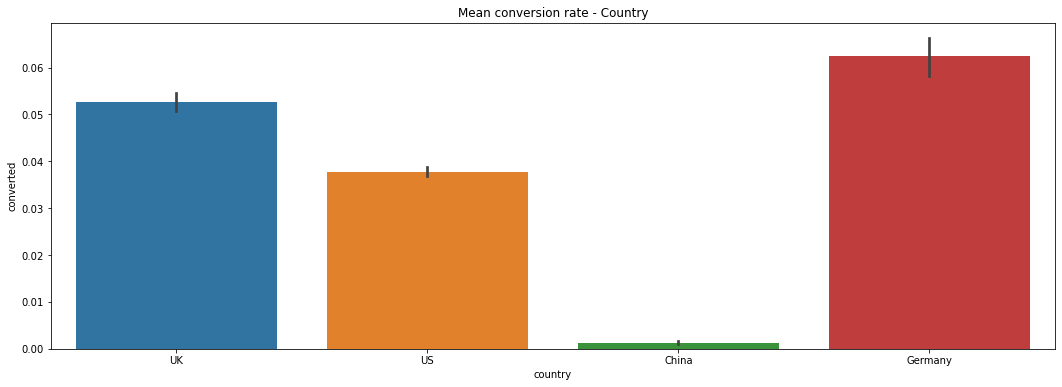

In [14]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'country', y = 'converted', data = df)
plt.title('Mean conversion rate - Country')

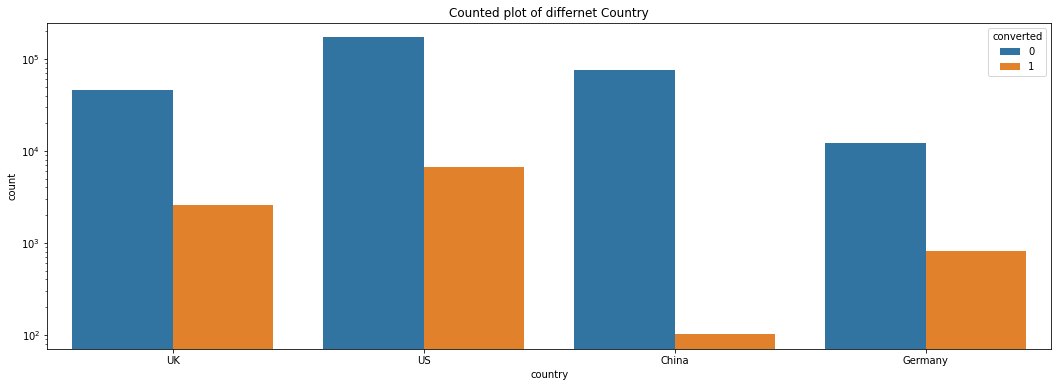

In [15]:
plt.figure(figsize = (18,6))
sns.countplot(x = 'country', hue = 'converted', data = df)
plt.title('Counted plot of differnet Country')
plt.yscale('log')

#### Source and Conversion rate

In [16]:
df[['source', 'converted']].groupby('source').mean().sort_values(by ='converted', ascending = False)
# using numpy to manipulate data
# df.groupby('source')['converted'].mean().sort_values(ascending=False)

,converted
source,
Ads,0.034472
Seo,0.032888
Direct,0.028169


##### Observation:
- Ads has the highest conversion rate

let's show some visualizaiton

Text(0.5, 1.0, 'Mean conversion rate - Source')

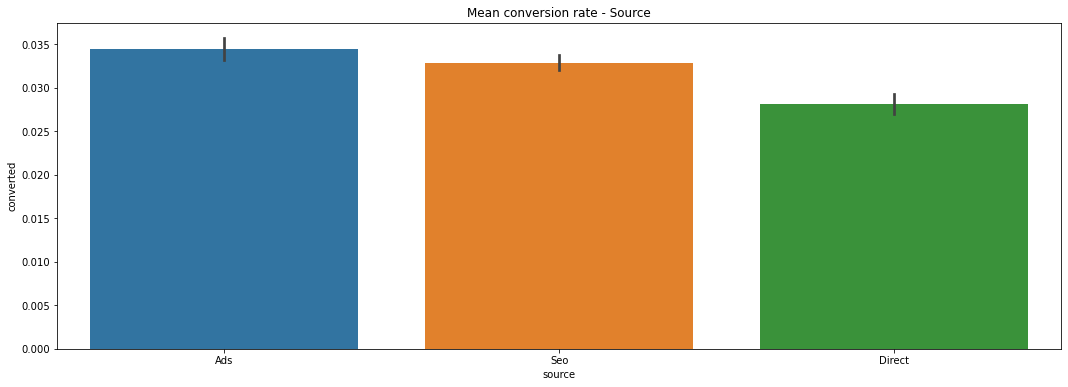

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x = 'source', y ='converted', data = df)
plt.title('Mean conversion rate - Source')

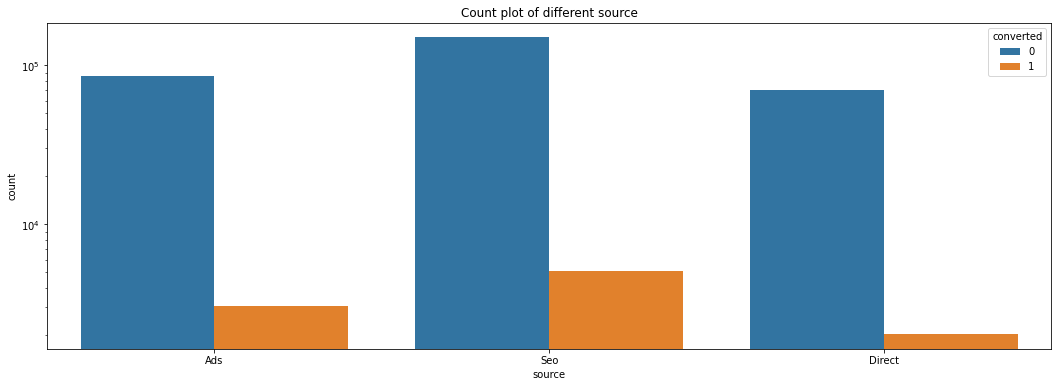

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'source', hue = 'converted', data = df)
plt.title("Count plot of different source")
plt.yscale('log')

#### Age and Conversion rate

/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


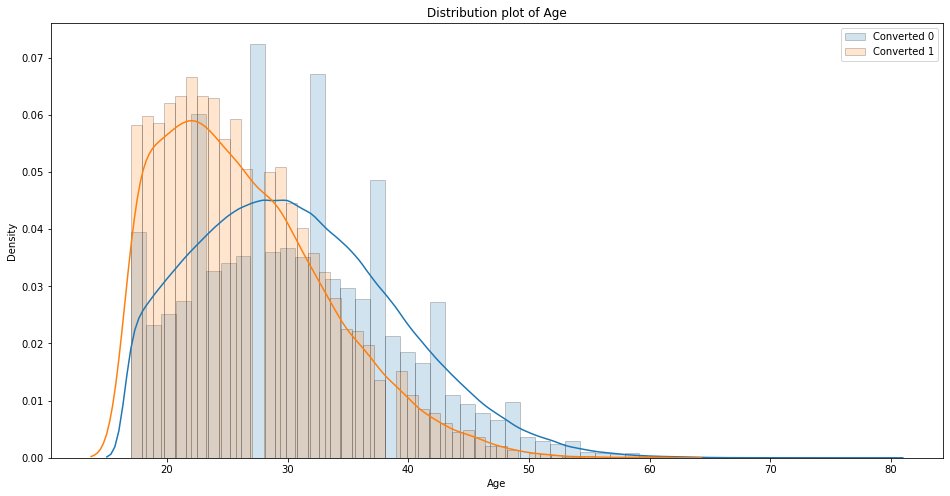

In [19]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha': 0.2}

plt.figure(figsize=(16,8))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', hist_kws = hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', hist_kws = hist_kws)
plt.legend()
plt.title('Distribution plot of Age')
plt.xlabel('Age');
# y axis is the probability density function for the kernel density estimation
# distplot usually used for two distplot comparison

#### The correlation between converted rate and age
- with the increasing of age, the converted rate keep decreasing

In [20]:
mean_age = df.groupby('age')['converted'].mean().reset_index()
mean_age.head()

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985


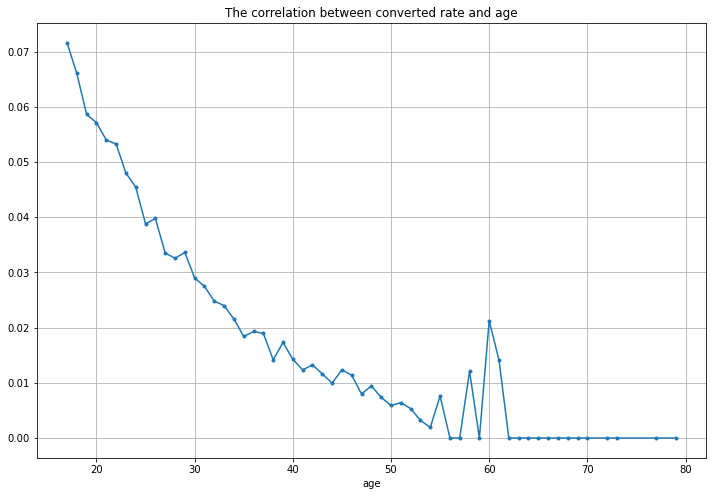

In [21]:
plt.figure(figsize=(12,8))
plt.plot(mean_age['age'], mean_age['converted'], '.-')
plt.title('The correlation between converted rate and age')
plt.xlabel('age')
plt.grid(True);

- around age 60, there is some fluctuation

#### Total page visited and conversion rate

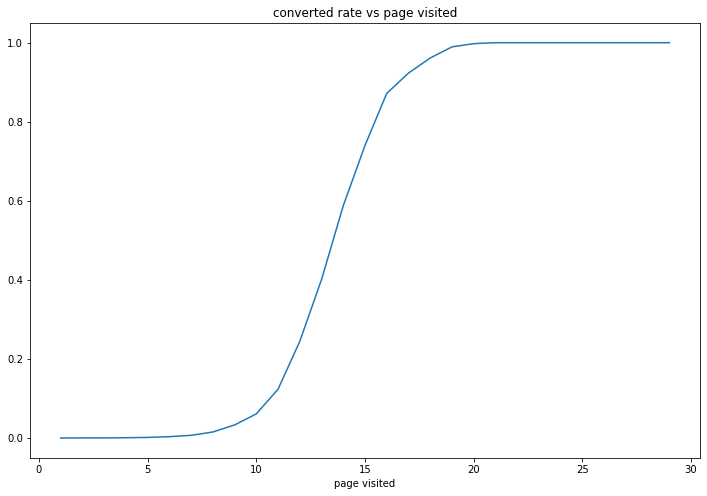

In [22]:
plt.figure(figsize=(12,8))
mean_page = df.groupby('total_pages_visited')['converted'].mean().reset_index()
plt.plot(mean_page['total_pages_visited'], mean_page['converted'])
plt.title('converted rate vs page visited')
plt.xlabel('page visited');

/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


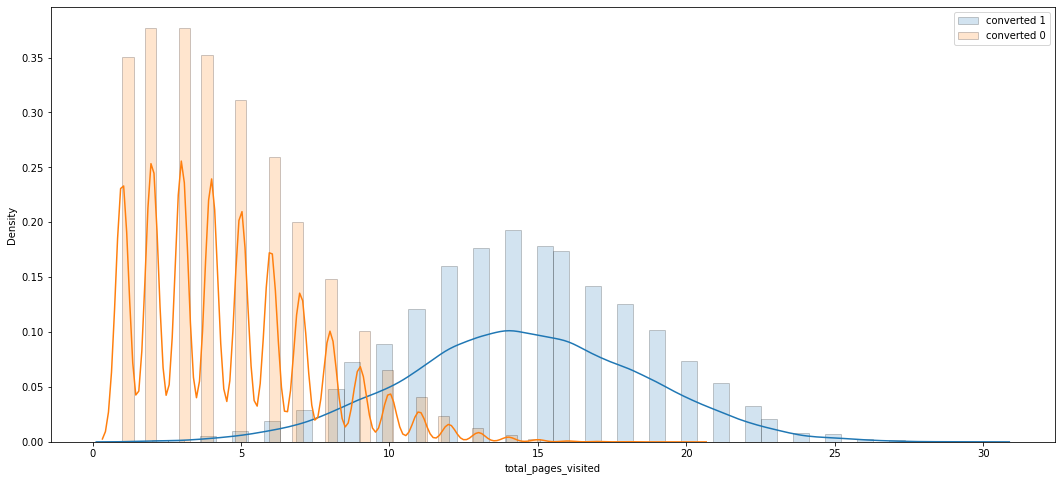

In [23]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha': 0.2}
plt.figure(figsize=(18,8))
sns.distplot(df[df['converted']==1]['total_pages_visited'], label = 'converted 1', hist_kws = hist_kws)
sns.distplot(df[df['converted']==0]['total_pages_visited'], label = 'converted 0', hist_kws = hist_kws)
plt.legend();

- for people who converted, they view the page mostly around 15

### Build Machine Learning Model for Prediction
##### here we need Classification model for prediction
- logsitic regression
- decision tree
- RuleFit
- Random Forest in combination with partial dependence plots

#### decide which categorical variavbles we want to use in model

In [24]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'country' has 4 unique categories
Feature 'source' has 3 unique categories


As the reults above, I think we are able to process these features to dummy variables
- create a list of features to dummy

In [25]:
todummy_list = [ 'country', 'source' ] # feature column that i need
# funciton to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [26]:
dummy_df = dummy_df(df, todummy_list)

<ipython-input-25-985062468ea3>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(x, 1)


In [27]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316198 non-null  int64
 1   new_user             316198 non-null  int64
 2   total_pages_visited  316198 non-null  int64
 3   converted            316198 non-null  int64
 4   country_China        316198 non-null  uint8
 5   country_Germany      316198 non-null  uint8
 6   country_UK           316198 non-null  uint8
 7   country_US           316198 non-null  uint8
 8   source_Ads           316198 non-null  uint8
 9   source_Direct        316198 non-null  uint8
 10  source_Seo           316198 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 22.2 MB


### Assign X and y for taining and testing set

In [28]:
y = dummy_df.converted
X = dummy_df.drop(['converted'], axis = 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test) 


0.9869089375730742

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9869089375730742


In [33]:
predicted_prob = model.predict_proba(X_test)[:,1] ##

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])

print(cm)

            Predicted No  Predicted Yes   Total
Actual No         100652            377  101029
Actual Yes           989           2328    3317
Total             101641           2705  104346


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    101029
           1       0.86      0.70      0.77      3317

    accuracy                           0.99    104346
   macro avg       0.93      0.85      0.88    104346
weighted avg       0.99      0.99      0.99    104346



### Obeservation
- from the report: 0: converted 1: non-converted
- we have uneven classes distribution (large amount of 0 but smaller amount of 1)
- precision(cost of False Positive ), classified as 1 but it is not 1 
- recall(cost of False Negative ), calssified as 0 but it is 1

Precision : 
- TP/(TP+FP) 关于identified as Positive的
- cost代价 of FP is high (认为是对的，实际上错了-> identified Positive的，实际上是 Negative的)
- ex: In the spam detection, 1: spam； 0: not spam； 
- False Positive is identified as spam but it is actually non-spam;  This might lose important imformation if percision is not high

Recall:
- TP/(TP+FN) 关于actual 是 Positive的
- cost of FN is high (认为是错的，实际上错了 -> identified as Negative, actually it is Positive)
- ex_1: fraud detection, 1: fraud; 0: non-fraud
- False Negative is identified as non-fraud but actually is fraud; The consequence can be very bad for the bank if the recall is low 
- ex_2: sick detection, 1: cancer; 0: not cancer
- False Negative is identified as not cancer but actually is cancer; FN的代价(cost) 很高，如果recall is low, sick 被错误预测，那么会后果严重

----- Note: 以上两种都是判断错误的

F-1 score:
- 2* (Precision*Recall / Precision+Recall )
- Use F-1 when we want to seek a balance between Precision and Recall AND there is an uneven classs distribution (large number of Actual Negatives)

Accuacy:
- TP+TN/TP+TN+FP+FN 判断对的/所有判断
- care more about TN; in business case, we don't focus much on TN, **but more on FN, FP (判断出错的部分)**, which have more business cost (angible & intangible)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coeff = model.coef_
coef_list = list(coeff[0,:])
coef_df = pd.DataFrame({'Feature': list(X_train.columns),'Coefficient': coef_list})
print(coef_df) 

               Feature  Coefficient
0                  age    -0.074209
1             new_user    -1.730442
2  total_pages_visited     0.761033
3        country_China    -3.599122
4      country_Germany     0.169692
5           country_UK    -0.052947
6           country_US    -0.461199
7           source_Ads    -1.261217
8        source_Direct    -1.408710
9           source_Seo    -1.273649


/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
feat_importances = coef_df #what we created before for coeff
feat_importances['importances'] = np.abs(feat_importances['Coefficient']) #coeff is feature importance
feat_importances.sort_values(by='importances', ascending=False, inplace=True)
feat_importances

,Feature,Coefficient,importances
3,country_China,-3.599122,3.599122
1,new_user,-1.730442,1.730442
8,source_Direct,-1.408710,1.408710
9,source_Seo,-1.273649,1.273649
7,source_Ads,-1.261217,1.261217
2,total_pages_visited,0.761033,0.761033
6,country_US,-0.461199,0.461199
4,country_Germany,0.169692,0.169692
0,age,-0.074209,0.074209
5,country_UK,-0.052947,0.052947


In [38]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)

In [39]:
print(rfc_model.score(X_test, y_test))

0.9849251528568417


In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_y_pred))

Accuracy: 0.9849251528568417


In [41]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101029
           1       0.81      0.69      0.74      3317

    accuracy                           0.98    104346
   macro avg       0.90      0.84      0.87    104346
weighted avg       0.98      0.98      0.98    104346



<AxesSubplot:>

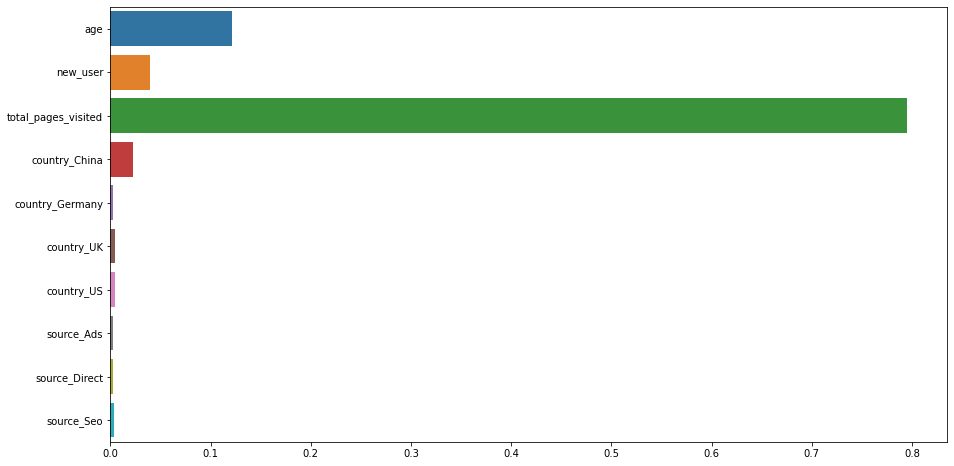

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x = rfc_model.feature_importances_, y = X.columns)

from the chart above, the most important feature is total_page_visited. how ever, it is hard for company to let
people to visit nore pages. Because, people probably visis more pages to buy things anyway, thus it is probably
caused by the action of purchase, rather than casuing a purchase.
- Buying action ---> more page visited
- more page visited might not be a reason to buy more

In [43]:
remove_page = X.drop(['total_pages_visited'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(remove_page,y, test_size=0.33, random_state=42)
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = forest.predict(X_test)
forest.score(X_test, y_test)

Accuracy: 0.9682115270350564


In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9682115270350564


In [56]:
feature_importance = pd.DataFrame({'Feature': X_train.columns ,'Importance':forest.feature_importances_})
feature_importance.sort_values(by='Importance',ascending=False, inplace=False)

,Feature,Importance
1,new_user,0.403762
0,age,0.338111
2,country_China,0.165902
5,country_US,0.028769
4,country_UK,0.025387
3,country_Germany,0.018217
7,source_Direct,0.008320
6,source_Ads,0.006476
8,source_Seo,0.005056


the most important feature now is weather a user is new or not

In [57]:
# Decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,class_weight={0: 0.7, 1: 0.3})
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=3)

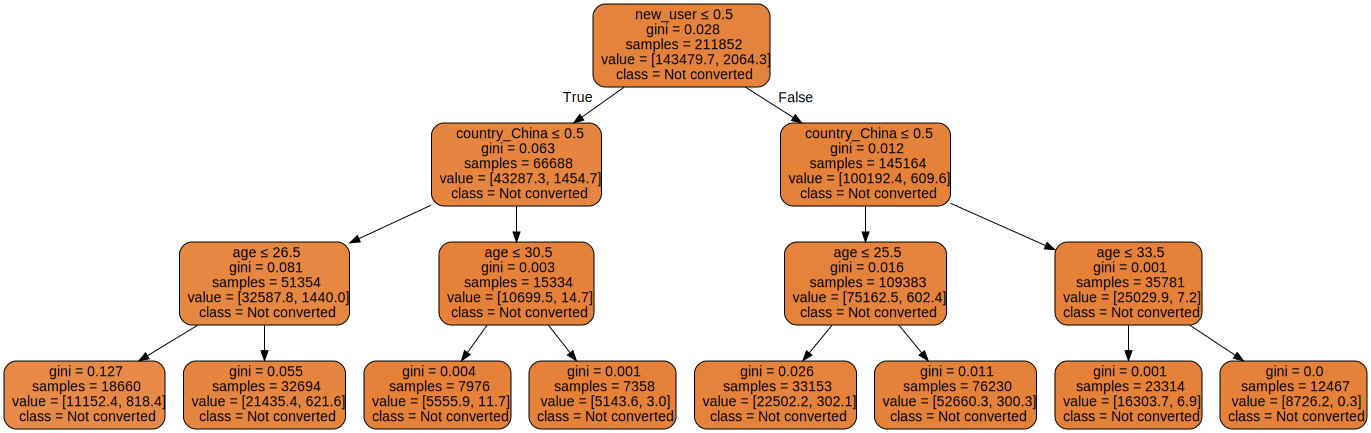

In [59]:
# import graphviz 

# # Visualization
# features = list(X_train.columns)
# targets = ['Not converted', 'converted']
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=targets, 
#                                 filled=True, rounded=True, special_characters=True, )  
# graph = graphviz.Source(dot_data)
# graph

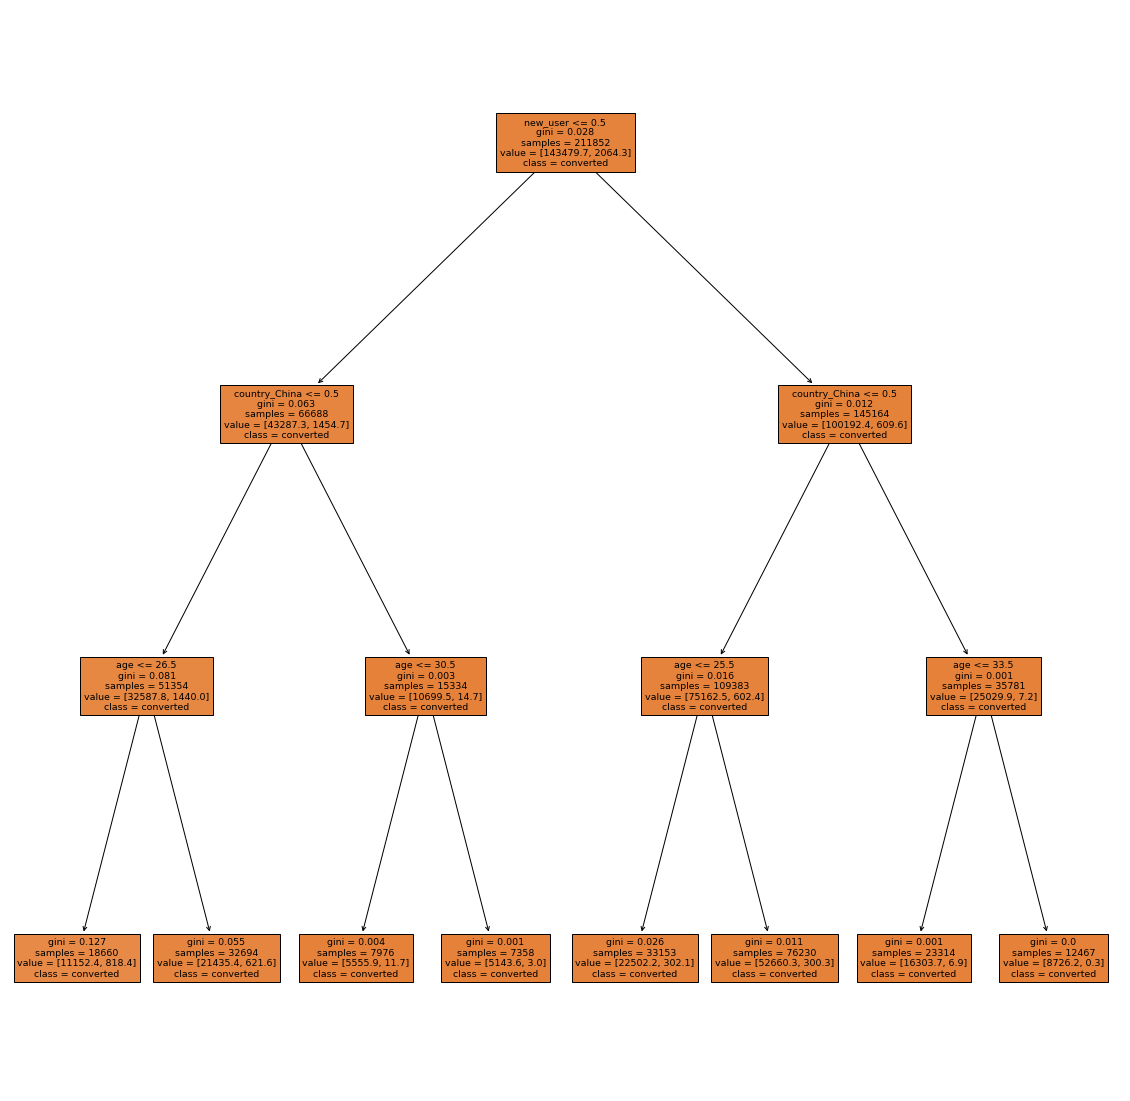

In [60]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf.fit(X_train, y_train),feature_names=list(X_train.columns), class_names=['converted'], filled=True) 
plt.show()

Some conclusions and suggestions:
1. The site is working very well for **young users**. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
2. The site is working very well for **Germany** in terms of conversion. But the summary showed that there are **few Germans coming to the site**: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.
3. Users with **old accounts** do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
4. Something is wrong with the **Chinese** version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why **older users** perform so poorly? From 30 y/o conversion clearly starts dropping.
6. If I know someone has **visited many pages**, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.

As you can see, conclusions usually end up being about:
1. tell marketing to **get more of the good performing user segments**
2. tell product to **fix the experience for the bad performing ones**

## Tuning Model Parameters

In [1]:
# implementing classifier
# creating a dictrinary for classifier
# classifiers ={
#     "LogisiticRegression": LogisticRegression(),
#     "Support Vector Classifier": SVC(),
#     "RandomForestClassifier": RandomForestClassifier(),
#     "DecisionTreeClassifier": DecisionTreeClassifier()
# }
# from sklearn.model_selection import GridSearchCV

In [2]:
# Use GridSearchCv to find the best parameters for different model
# from sklearn.model_selection import GridSearchCV

# #LogisticRegression
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100,1000,10000]}
# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log_reg.fit(X_train, y_train)

# # logistic regression best parameters.
# log_reg = grid_log_reg.best_estimator_



In [ ]:
# SVC 
# Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

In [3]:
# Random Forest Classifier
# rfc_params = {'max_depth':[10,20,30,40,50,60,70,80,90,100,None], 'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]}
# grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params)
# grid_rfc.fit(X_train, y_train)

# rfc = grid_rfc.best_estimator

In [ ]:
# tree_params = {"max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
# grid_tree.fit(X_train, y_train)

# tree best estimator
# tree_clf = grid_tree.best_estimator_

# print("Classifers with their tuned parameters we got via GridSearchCV")
# print(log_reg)
# print(svc)
# print(frc)
# print(tree_clf)